In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import time

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt import dummy_minimize
from skopt import forest_minimize
from skopt.plots import plot_convergence

C:\Users\64161\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\64161\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#数据初始化
boston = load_boston()
x,  y  = boston.data , boston.target
feature_n  =  x.shape[1]

#模型初始化
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

#域初始化
space  = [Integer(1, 10, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, feature_n, name='max_features'),
          Integer(2, 200, name='min_samples_split'),
          Integer(1, 200, name='min_samples_leaf')]

#目标方法初始化
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, x, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [4]:
#随机自动调参
time_start_1=time.time()
res_grid = dummy_minimize(objective, space, n_calls=30, random_state=0)
time_end_1=time.time()

In [5]:
#GP自动调参
time_start_2=time.time()
res_gp = gp_minimize(objective, space, n_calls=30, random_state=0)
time_end_2=time.time()

In [6]:
#SMAC自动调参
time_start_3=time.time()
res_smac = forest_minimize(objective, space, n_calls=30, random_state=0)
time_end_3=time.time()

In [7]:
#随机调参结果
print('Algorithm: Random Grid')
print("Best score=%.4f" % res_grid.fun)
print('dummy_minimize totally cost',time_end_1-time_start_1)
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_grid.x[0], res_grid.x[1], 
                            res_grid.x[2], res_grid.x[3], 
                            res_grid.x[4]))

Algorithm: Random Grid
Best score=3.2769
dummy_minimize totally cost 3.26227068901062
Best parameters:
- max_depth=4
- learning_rate=0.211599
- max_features=3
- min_samples_split=157
- min_samples_leaf=15


In [8]:
#GP调参结果
print('Algorithm: Gaussion Process')
print("Best score=%.4f" % res_gp.fun)
print('gp_minimize totally cost',time_end_2-time_start_2)
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3], 
                            res_gp.x[4]))

Algorithm: Gaussion Process
Best score=2.9713
gp_minimize totally cost 10.38023066520691
Best parameters:
- max_depth=10
- learning_rate=0.142433
- max_features=13
- min_samples_split=130
- min_samples_leaf=1


In [9]:
#SMAC调参结果
print('Algorithm: Forest Based')
print("Best score=%.4f" % res_smac.fun)
print('gp_minimize totally cost',time_end_3-time_start_3)
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_smac.x[0], res_smac.x[1], 
                            res_smac.x[2], res_smac.x[3], 
                            res_smac.x[4]))

Algorithm: Forest Based
Best score=3.3391
gp_minimize totally cost 4.487029314041138
Best parameters:
- max_depth=6
- learning_rate=0.355657
- max_features=13
- min_samples_split=152
- min_samples_leaf=61


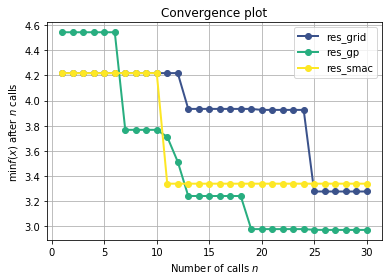

In [26]:
plot_convergence(res_grid,res_gp,res_smac)
plt.legend(['res_grid', 'res_gp', 'res_smac'], loc = 'upper right') 